In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
data=pd.read_csv("S&P 500 Index.xlsx - file.csv",delimiter=",")

In [62]:
data.head(5)

,Name,Date,Open,High,Low,Close
0,SPX.GI,2019-12-05 10:20,3105.66,3108.78,3105.66,3108.74
1,SPX.GI,2019-12-05 10:25,3108.73,3109.20,3107.96,3108.40
2,SPX.GI,2019-12-05 10:30,3108.42,3109.97,3107.70,3109.81
3,SPX.GI,2019-12-05 10:35,3109.72,3111.60,3109.58,3110.56
4,SPX.GI,2019-12-05 10:40,3110.65,3111.20,3109.36,3109.82


In [63]:
mi = min(data['Date'])
ma = max(data['Date'])

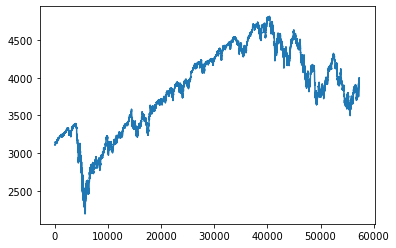

In [64]:

plt.plot(data["Close"])



In [65]:
rate=(np.log(data["Open"])/np.log(data["Close"])/5)*100

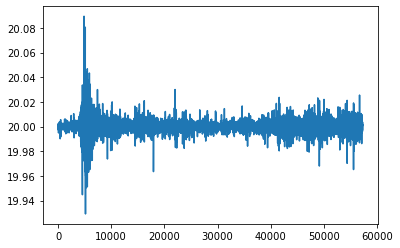

In [66]:
plt.plot(rate)

In [67]:
data["log_return"] = np.nan
for i in range(1,len(data["Date"])):
    data.loc[i,"log_return_sqr"] = ((np.log(data.loc[i,"Close"])-np.log(data.loc[i-1,"Close"]))*100)**2
    
    
for i in range(1,len(data["Date"])):
    data.loc[i,"log_return"] = (np.log(data.loc[i,"Close"])-np.log(data.loc[i-1,"Close"]))*100

In [68]:
data.tail()

,Name,Date,Open,High,Low,Close,log_return,log_return_sqr
57285,SPX.GI,2022-11-11 15:40,3988.72,3995.15,3988.08,3994.93,0.155067,0.024046
57286,SPX.GI,2022-11-11 15:45,3994.89,3997.88,3994.41,3997.82,0.072316,0.005230
57287,SPX.GI,2022-11-11 15:50,3997.87,4001.28,3996.24,3999.07,0.031262,0.000977
57288,SPX.GI,2022-11-11 15:55,3999.06,4000.29,3993.02,3994.29,-0.119599,0.014304
57289,SPX.GI,2022-11-11 17:06,3994.37,3994.39,3990.16,3992.93,-0.034054,0.001160


In [69]:

data['Day'] = data["Date"].str.split(' ').str[0]

In [70]:
data.head()

,Name,Date,Open,High,Low,Close,log_return,log_return_sqr,Day
0,SPX.GI,2019-12-05 10:20,3105.66,3108.78,3105.66,3108.74,NaN,NaN,2019-12-05
1,SPX.GI,2019-12-05 10:25,3108.73,3109.20,3107.96,3108.40,-0.010938,0.000120,2019-12-05
2,SPX.GI,2019-12-05 10:30,3108.42,3109.97,3107.70,3109.81,0.045351,0.002057,2019-12-05
3,SPX.GI,2019-12-05 10:35,3109.72,3111.60,3109.58,3110.56,0.024114,0.000582,2019-12-05
4,SPX.GI,2019-12-05 10:40,3110.65,3111.20,3109.36,3109.82,-0.023793,0.000566,2019-12-05


In [71]:
datas=data[["Day","log_return_sqr"]]

In [72]:
# DAY
dayd=datas.groupby(["Day"]).sum()

In [73]:
dayd.head(11)

,log_return_sqr
Day,
2019-12-05,0.070040
2019-12-06,0.616348
2019-12-09,0.051725
2019-12-10,0.176594
2019-12-11,0.088090
2019-12-12,0.630203
2019-12-13,0.374203
2019-12-16,0.583274
2019-12-17,0.077952


In [76]:
dayd2=dayd.reset_index()
dayd2.tail(10)
dayd2["week_log_return_sqr"]=0.0

In [77]:
# Week (1-5)

#monthd=datams.groupby(["Year","Month"]).mean()


for i in range(0,len(dayd2["log_return_sqr"])-4):
    dayd2["week_log_return_sqr"][i]=(dayd2.loc[i:i+4,"log_return_sqr"].sum())/5
    


<ipython-input-77-4592a49c4113>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dayd2["week_log_return_sqr"][i]=(dayd2.loc[i:i+4,"log_return_sqr"].sum())/5


In [78]:
dayd2.tail(10)

,Day,log_return_sqr,week_log_return_sqr
728,2022-10-31,1.233758,2.543160
729,2022-11-01,1.676301,2.432877
730,2022-11-02,3.740318,2.362827
731,2022-11-03,2.187714,1.888834
732,2022-11-04,3.877709,4.082096
733,2022-11-07,0.682344,3.509699
734,2022-11-08,1.326048,0.000000
735,2022-11-09,1.370356,0.000000
736,2022-11-10,13.154022,0.000000
737,2022-11-11,1.015725,0.000000


In [79]:
# Month
dayd2["month_log_return_sqr"]=0.0
for i in range(0,len(dayd2["log_return_sqr"])-20):
    dayd2["month_log_return_sqr"][i]=dayd2.loc[i:i+20,"log_return_sqr"].sum()/21

<ipython-input-79-144abe866bde>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dayd2["month_log_return_sqr"][i]=dayd2.loc[i:i+20,"log_return_sqr"].sum()/21


In [83]:
dayd2.tail(22)

,Day,log_return_sqr,week_log_return_sqr,month_log_return_sqr
716,2022-10-13,10.838424,5.756028,3.249539
717,2022-10-14,3.489850,3.824284,2.781791
718,2022-10-17,6.514763,3.579201,0.000000
719,2022-10-18,6.600078,2.711499,0.000000
720,2022-10-19,1.337025,1.526991,0.000000
721,2022-10-20,1.179706,1.469526,0.000000
722,2022-10-21,2.264433,1.594828,0.000000
723,2022-10-24,2.176255,1.353494,0.000000
724,2022-10-25,0.677535,1.164995,0.000000
725,2022-10-26,1.049702,1.364748,0.000000


In [84]:
# Final: droping the last 20 rows
m1=dayd2["month_log_return_sqr"]!=0
RV=dayd2[m1]
RV.tail(10)

,Day,log_return_sqr,week_log_return_sqr,month_log_return_sqr
708,2022-10-03,1.833961,2.378276,2.702210
709,2022-10-04,4.461842,2.309695,2.694703
710,2022-10-05,1.645061,1.895762,2.660345
711,2022-10-06,1.376505,1.716010,2.686185
712,2022-10-07,2.574010,3.608394,2.805290
713,2022-10-10,1.491055,3.791561,2.715211
714,2022-10-11,2.392181,4.796303,2.707353
715,2022-10-12,0.746298,5.637882,2.658695
716,2022-10-13,10.838424,5.756028,3.249539
717,2022-10-14,3.489850,3.824284,2.781791


In [85]:
RV

,Day,log_return_sqr,week_log_return_sqr,month_log_return_sqr
0,2019-12-05,0.070040,0.200559,0.245555
1,2019-12-06,0.616348,0.312592,0.249563
2,2019-12-09,0.051725,0.264163,0.231537
3,2019-12-10,0.176594,0.370473,0.246274
4,2019-12-11,0.088090,0.350744,0.244390
...,...,...,...,...
713,2022-10-10,1.491055,3.791561,2.715211
714,2022-10-11,2.392181,4.796303,2.707353
715,2022-10-12,0.746298,5.637882,2.658695
716,2022-10-13,10.838424,5.756028,3.249539


In [86]:
RV.loc[1:,"log_return_sqr"]

1       0.616348
2       0.051725
3       0.176594
4       0.088090
5       0.630203
         ...    
713     1.491055
714     2.392181
715     0.746298
716    10.838424
717     3.489850
Name: log_return_sqr, Length: 717, dtype: float64

In [87]:
next_day = list(RV.loc[1:,"log_return_sqr"])
next_day.append(np.nan)

RV["next_day"] = next_day

<ipython-input-87-081b38d5caa8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RV["next_day"] = next_day


In [88]:
RV = RV.iloc[:715,:]

In [89]:
RV

,Day,log_return_sqr,week_log_return_sqr,month_log_return_sqr,next_day
0,2019-12-05,0.070040,0.200559,0.245555,0.616348
1,2019-12-06,0.616348,0.312592,0.249563,0.051725
2,2019-12-09,0.051725,0.264163,0.231537,0.176594
3,2019-12-10,0.176594,0.370473,0.246274,0.088090
4,2019-12-11,0.088090,0.350744,0.244390,0.630203
...,...,...,...,...,...
710,2022-10-05,1.645061,1.895762,2.660345,1.376505
711,2022-10-06,1.376505,1.716010,2.686185,2.574010
712,2022-10-07,2.574010,3.608394,2.805290,1.491055
713,2022-10-10,1.491055,3.791561,2.715211,2.392181


In [90]:
import statsmodels.api as sm

model = sm.OLS(RV[["next_day"]], RV.iloc[:,1:-1])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               next_day   R-squared (uncentered):                   0.738
Model:                            OLS   Adj. R-squared (uncentered):              0.737
Method:                 Least Squares   F-statistic:                              669.0
Date:                Tue, 22 Nov 2022   Prob (F-statistic):                   1.23e-206
Time:                        17:36:02   Log-Likelihood:                         -1947.0
No. Observations:                 715   AIC:                                      3900.
Df Residuals:                     712   BIC:                                      3914.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
log_return_sqr          -0.2749      0.035     -7.747      0.000      -0.345      -0.205
week_log_return_sqr      1.3665      0.052     26.056      0.000       1.264       1.470
month_log_return_sqr    -0.1566      0.042     -3.696      0.000      -0.240      -0.073
==============================================================================
Omnibus:                      329.109   Durbin-Watson:                   2.254
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           449745.937
Skew:                           0.261   Prob(JB):                         0.00
Kurtosis:                     125.866   Cond. No.                         4.64
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
RV.head()

,Day,log_return_sqr,week_log_return_sqr,month_log_return_sqr,next_day
0,2019-12-05,0.070040,0.200559,0.245555,0.616348
1,2019-12-06,0.616348,0.312592,0.249563,0.051725
2,2019-12-09,0.051725,0.264163,0.231537,0.176594
3,2019-12-10,0.176594,0.370473,0.246274,0.088090
4,2019-12-11,0.088090,0.350744,0.244390,0.630203


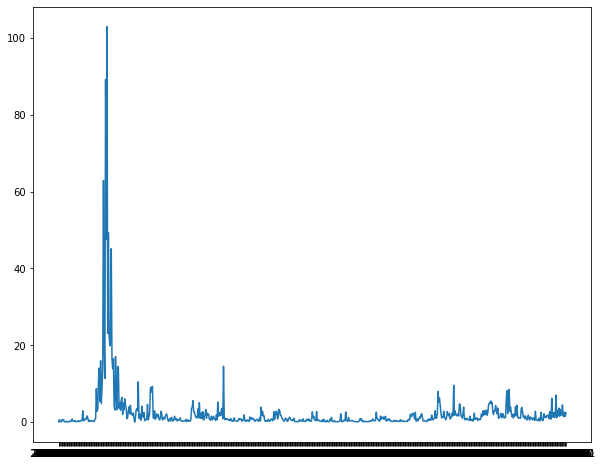

In [94]:
plt.figure(figsize=[10,8])
plt.plot(RV['Day'],RV['log_return_sqr'])